# Análise de Pedidos e Cancelamentos – DataLog 2024/2025 

Este relatório visa avaliar o desempenho de pedidos da empresa **DataLog** entre os anos de **2024 e 2025**, identificar padrões sazonais, projetar demanda para os próximos meses e propor melhorias com base nos cancelamentos observados.

A análise abrange:

- Volume de pedidos mensais
- Previsão de demanda com Prophet
- Comparação ano a ano
- Indicadores de cancelamento
- Projeções para maio de 2025
- Propostas de melhorias operacionais


C:\Users\glori\AppData\Local\Temp\ipykernel_14188\3557374408.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pedidos_mensais, x='AnoMes', y='Pedidos', palette='Blues_d')


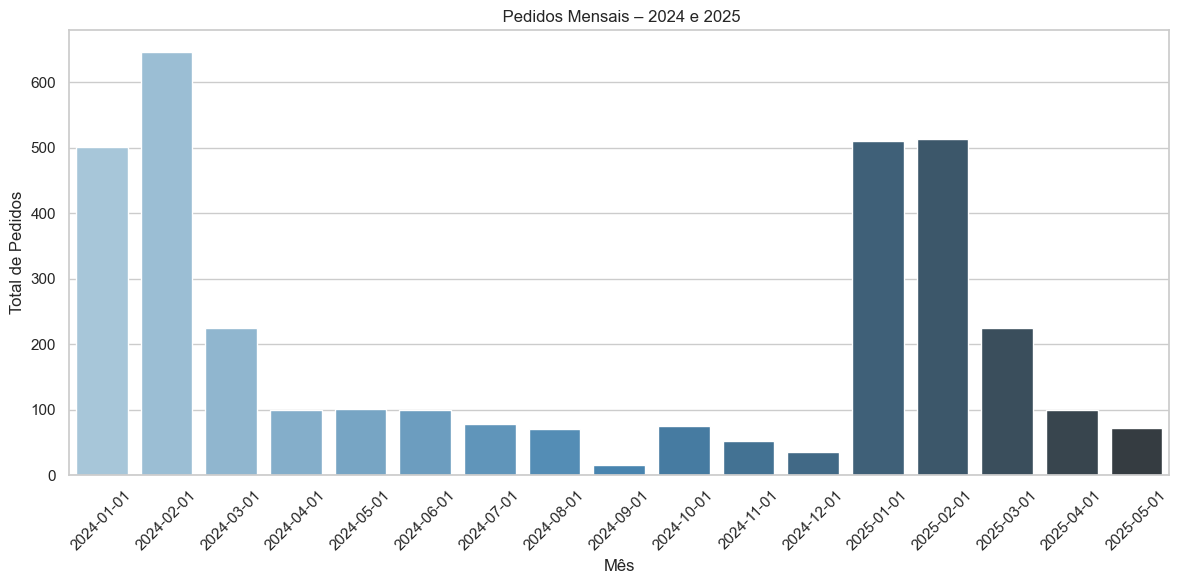

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style='whitegrid')

# Carregando dados
df_2024 = pd.read_excel('../Vendas_24.xlsx')
df_2025 = pd.read_excel('../Pedidos_Jan_Maio_2025.xlsx')
df_total = pd.concat([df_2024, df_2025], ignore_index=True)

# Ajuste da data
df_total['DataPedido'] = pd.to_datetime(df_total['DataPedido'], dayfirst=True, errors='coerce')
df_total['AnoMes'] = df_total['DataPedido'].dt.to_period('M')

# Agrupamento
pedidos_mensais = df_total.groupby('AnoMes').size().reset_index(name='Pedidos')
pedidos_mensais['AnoMes'] = pedidos_mensais['AnoMes'].dt.to_timestamp()

# Gráfico geral
plt.figure(figsize=(12,6))
sns.barplot(data=pedidos_mensais, x='AnoMes', y='Pedidos', palette='Blues_d')
plt.title(' Pedidos Mensais – 2024 e 2025')
plt.xlabel('Mês')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\glori\AppData\Local\Temp\ipykernel_14188\1347364875.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['2024', '2025'], y=valores, palette='pastel')


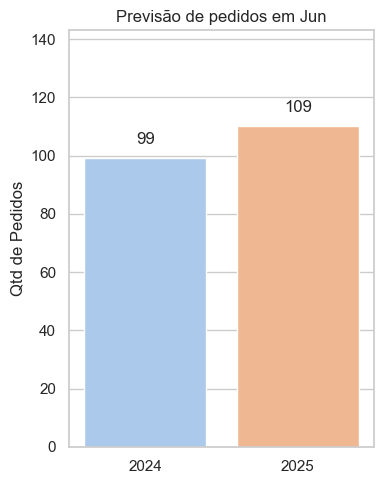

C:\Users\glori\AppData\Local\Temp\ipykernel_14188\1347364875.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['2024', '2025'], y=valores, palette='pastel')


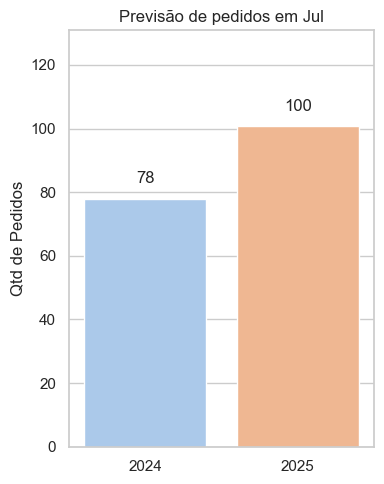

C:\Users\glori\AppData\Local\Temp\ipykernel_14188\1347364875.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['2024', '2025'], y=valores, palette='pastel')


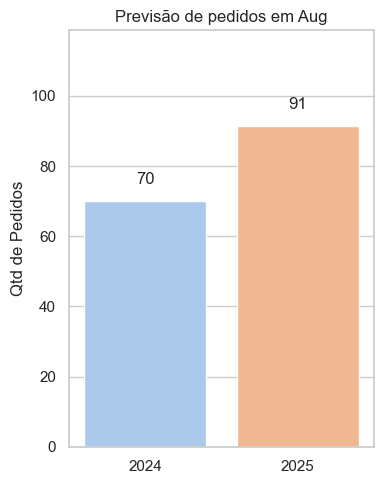

C:\Users\glori\AppData\Local\Temp\ipykernel_14188\1347364875.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['2024', '2025'], y=valores, palette='pastel')


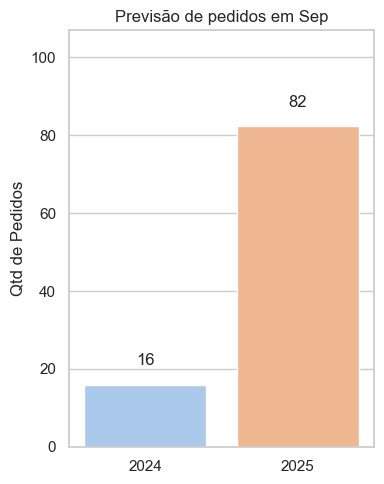

In [4]:
# Comparando meses iguais ano a ano
previsoes_2025 = previsao[previsao['ds'].dt.strftime('%Y-%m').isin(['2025-06', '2025-07', '2025-08', '2025-09'])]
previsoes_2025 = previsoes_2025[['ds', 'yhat']].copy()
previsoes_2025['mes'] = previsoes_2025['ds'].dt.strftime('%b')

reais_2024 = df_mensal[df_mensal['ds'].dt.strftime('%Y-%m').isin(['2024-06', '2024-07', '2024-08','2024-09'])]
reais_2024 = reais_2024[['ds', 'y']].copy()
reais_2024['mes'] = reais_2024['ds'].dt.strftime('%b')

# União
comparativo = pd.merge(reais_2024, previsoes_2025, on='mes', how='inner')
comparativo = comparativo.rename(columns={'y': '2024', 'yhat': '2025'})

# Gráficos mês a mês
for i, row in comparativo.iterrows():
    mes = row['mes']
    valores = [row['2024'], row['2025']]
    
    plt.figure(figsize=(4, 5))
    sns.barplot(x=['2024', '2025'], y=valores, palette='pastel')
    plt.title(f'Previsão de pedidos em {mes}')
    plt.ylabel('Qtd de Pedidos')
    plt.ylim(0, max(valores) * 1.3)
    for idx, valor in enumerate(valores):
        plt.text(idx, valor + 5, f'{int(valor)}', ha='center')
    plt.tight_layout()
    plt.show()


In [5]:
# Indicadores
pedidos_24 = 2000
cancel_24 = 640
pedidos_25 = 1421
cancel_25 = 434

perc_24 = cancel_24 / pedidos_24 * 100
perc_25 = cancel_25 / pedidos_25 * 100

print(f" Cancelamentos em 2024: {perc_24:.2f}%")
print(f" Cancelamentos em 2025: {perc_25:.2f}%")


 Cancelamentos em 2024: 32.00%
 Cancelamentos em 2025: 30.54%


In [6]:
# Projeção baseada em amostra parcial
ped_24_jan_maio = 1574
ped_25_jan_maio = 1401  # até 16 de maio

estimativa_maio_2025 = int((1401 / 16) * 31)
aumento_percentual = ((estimativa_maio_2025 - 1574) / 1574) * 100

print(f" Estimativa total para maio/2025: {estimativa_maio_2025} pedidos")
print(f" Aumento estimado vs. maio/2024: {aumento_percentual:.2f}%")


 Estimativa total para maio/2025: 2714 pedidos
 Aumento estimado vs. maio/2024: 72.43%


C:\Users\glori\AppData\Local\Temp\ipykernel_14188\3255547809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Jan-Mai 2024', 'Jan-Mai 2025 (Proj.)'], y=[ped_24_jan_maio, estimativa_maio_2025], palette='muted')


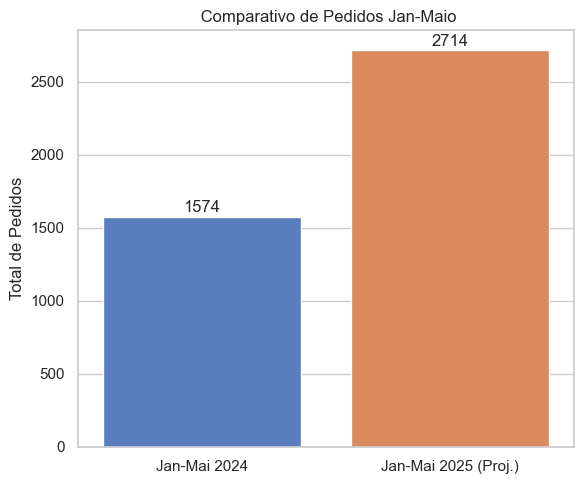

In [7]:
plt.figure(figsize=(6,5))
sns.barplot(x=['Jan-Mai 2024', 'Jan-Mai 2025 (Proj.)'], y=[ped_24_jan_maio, estimativa_maio_2025], palette='muted')
plt.title(' Comparativo de Pedidos Jan-Maio')
plt.ylabel('Total de Pedidos')
for i, val in enumerate([ped_24_jan_maio, estimativa_maio_2025]):
    plt.text(i, val + 30, str(val), ha='center')
plt.tight_layout()
plt.show()


# 📌 Propostas de Melhoria Baseadas nos Dados

---

### 1. Gestão de Estoque e Cadastro

**Problema:** Falhas recorrentes no cadastro de produtos e disponibilidade de estoque geram cancelamentos.

**Propostas:**
- Implementar sistema ERP com gestão de produtos e estoque em tempo real
- Automatizar o cadastro com validações (ex: códigos únicos, pesos, dimensões)
- Inventário rotativo semanal e alertas automáticos de reposição

---

### 2. Comunicação com o Cliente

**Problema:** Clientes são pegos de surpresa com cancelamentos.

**Propostas:**
- Automatizar envio de SMS/e-mail de confirmação ou cancelamento
- Criar sistema de rastreamento de pedidos por WhatsApp ou portal
- Disponibilizar canal direto com atendimento (chatbot, SAC 2.0)

---

### 3. Monitoramento de Indicadores

**Problema:** Falta de visão sobre evolução de cancelamentos e sazonalidade.

**Propostas:**
- Dashboard mensal com: volume de pedidos, cancelamentos, produto mais pedido, produto mais cancelado
- Comparação ano a ano com metas por time

---

### 4. Otimização Logística

**Problema:** Prazos de entrega e rupturas de estoque.

**Propostas:**
- Simular cenários com ferramentas de previsão (como Prophet)
- Criar rotas dinâmicas e integrar com mapa de disponibilidade

---
